In [15]:
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt
from astropy.visualization import quantity_support
quantity_support()
import glob
import gzip
import tensorflow as tf

In [16]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 8]

In [17]:
model = tf.keras.models.load_model('xseer/xseer.h5', compile=False)

In [4]:
with gzip.open('data/spectra_vecs.npy.gz') as f:
    vecs = np.load(f)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec_input (InputLayer)      [(None, 4000, 1)]         0         
_________________________________________________________________
flatten (Flatten)            (None, 4000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4000)              0         
_________________________________________________________________
dense (Dense)                (None, 400)               1600400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0     

In [6]:
out = model(vecs[0].reshape(1, -1, 1)).numpy()

In [7]:
out[0, :]

array([ 0.01299442, -0.07518864, -0.04163761, ..., -0.06615064,
        0.20396487, -0.00496261], dtype=float32)

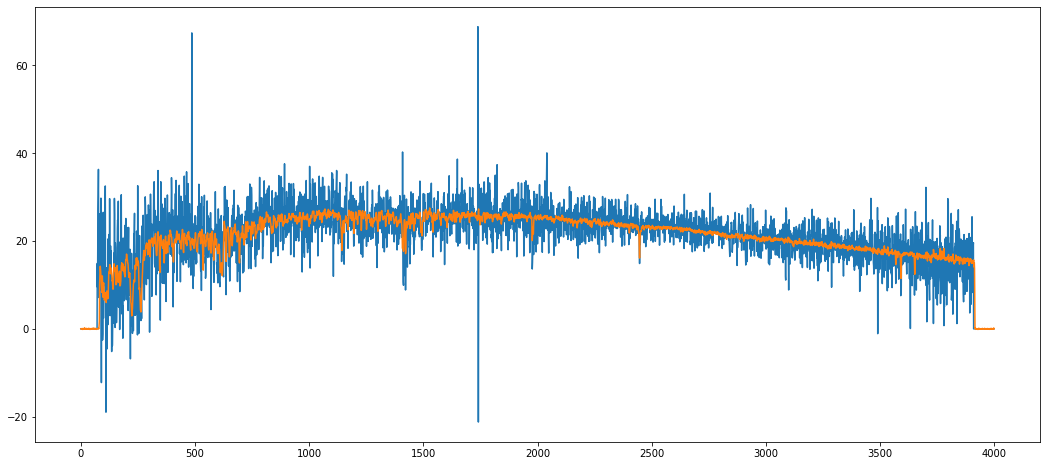

In [8]:
plt.plot(vecs[0])
plt.plot(out[0, :])
plt.show()

In [9]:
vecs[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
lines = glob.glob('data/dr14/*')

In [19]:
tstr = lines[0]

In [46]:
'../' + tstr

'../data/dr14/spec-0324-51616-0194.fits'

In [14]:
tstr[-5:] == '.fits'

True

In [51]:
lam2vec = lambda x : (10000 * np.round(x-3.5725, 4)).astype(np.int32)

In [52]:
def read_spectra(file):
    with fits.open(file) as f:
        specdata = f[1].data
        
    return specdata['loglam'], specdata['flux']

def write_vec(file):
    vec = np.zeros(4000, dtype=np.float32)
    
    lam, flux = read_spectra(file)
    i, s = lam2vec(lam)[0], lam.shape[0]
    vec[i:i+s] = flux
    return vec

In [34]:
specdata = fits.open(lines[0])

In [32]:
specdata.close()

In [44]:
specdata[0].fileinfo()

{'file': <astropy.io.fits.file._File <_io.FileIO name='data/dr14/spec-0324-51616-0194.fits' mode='rb' closefd=True>>,
 'filemode': 'readonly',
 'hdrLoc': 0,
 'datLoc': 11520,
 'datSpan': 0}

In [53]:
vec = write_vec(lines[0])

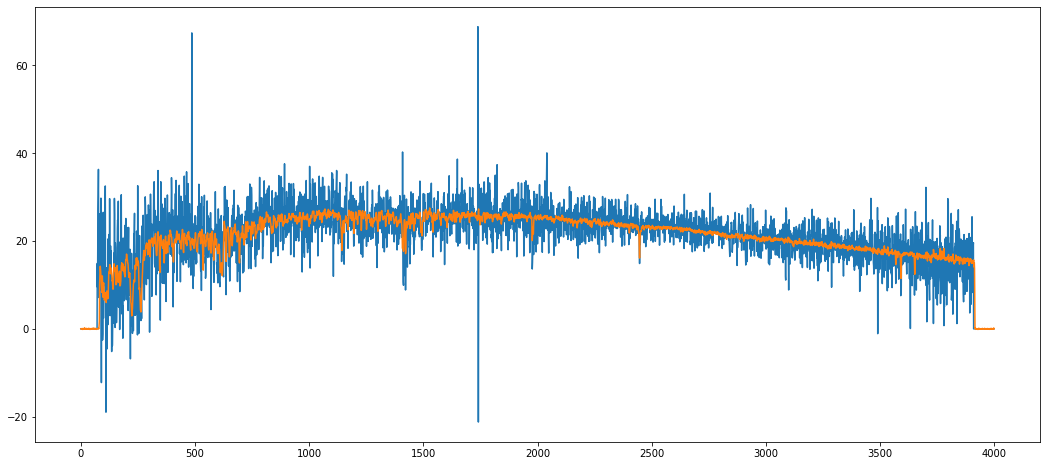

In [15]:
plt.plot(vec)
plt.plot(model(vec.reshape(1, -1, 1))[0,:])
plt.show()

In [18]:
nvec = model(vec.reshape(1, -1, 1))[0,:].numpy()

In [47]:
nvec = nvec[72:3910]

In [52]:
tfile = fits.open(lines[0])

In [53]:
tspec = tfile[1].data

In [54]:
tspec['loglam'].shape

(3838,)

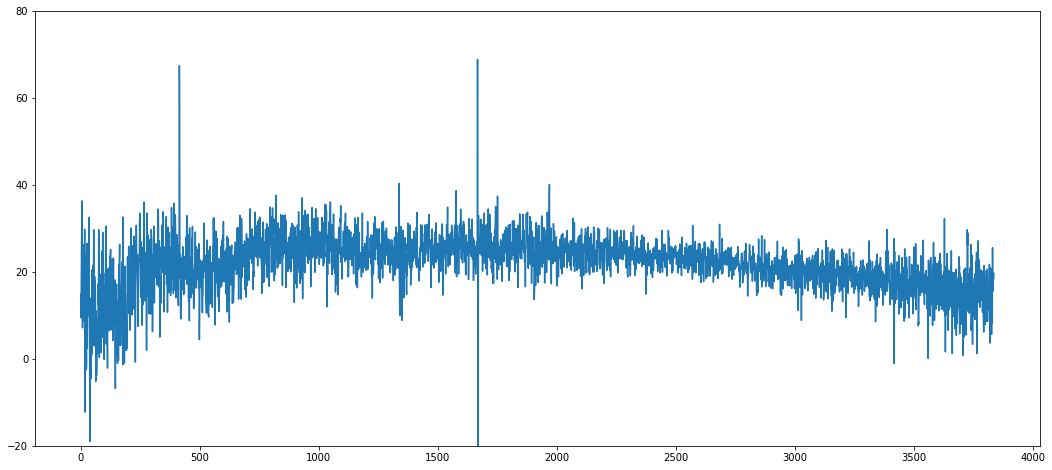

In [55]:
plt.plot(tspec['flux'])
plt.ylim(-20, 80)
plt.show()

In [56]:
tspec['flux'] = nvec

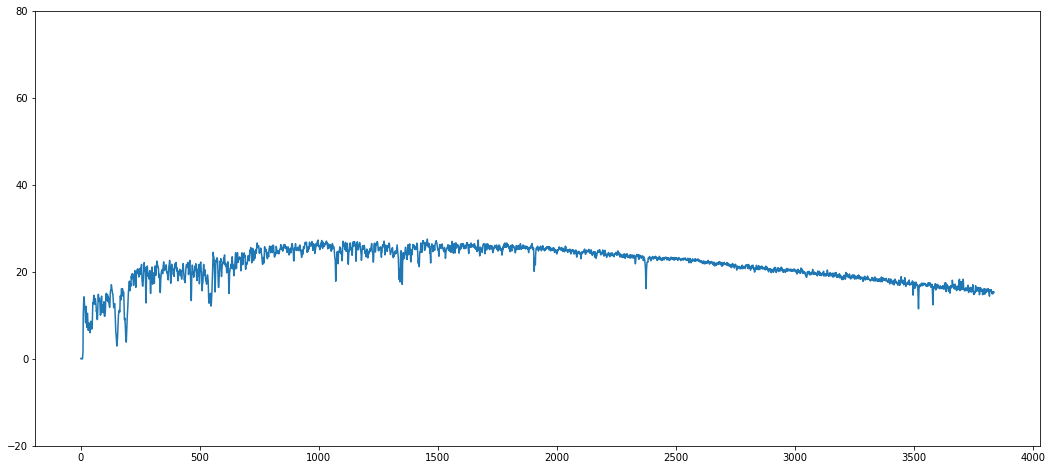

In [57]:
plt.plot(tspec['flux'])
plt.ylim(-20, 80)
plt.show()

In [46]:
vec[72:3910]

array([14.921837,  9.466149, 18.472567, ..., 18.208101, 19.003216,
       19.636297], dtype=float32)

In [58]:
tfile.writeto('data/nspec.fits')

In [61]:
tfile.close()

In [64]:
tfile[0]

In [58]:
np.nonzero(vec)[0][-1]

3909

In [22]:
import uuid

In [23]:
str(uuid.uuid4())

'a0a505e9-4cf1-47c6-93af-48a3e9996c8f'

In [41]:
import datetime
basename = "mylogfile"
suffix = datetime.datetime.now().strftime("%y%m%d_%H%M%S")
filename = "_".join([basename, suffix])

'mylogfile_191211_131121'

Xseer class methods
 - initialize and denoise for a file
 - display results
 - save to new file (default to datetime format)